In [1]:
import scanpy as sc
import harmonypy as hm
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Load data

In [2]:
adata = sc.read_h5ad("../data/adata_merged.h5ad")
adata

AnnData object with n_obs × n_vars = 3261 × 22425
    obs: 'sample', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    layers: 'counts'

# Preprocessing & batch correction

In [3]:
# 데이터 전처리 (필요시 실행)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, batch_key='sample')
# adata = adata[:, adata.var['highly_variable']]

In [4]:
# PCA 수행
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

/home/jsw/jswenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-31 11:17:38.369221: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-31 11:17:38.374823: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-31 11:17:38.381243: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-31 11:17:38.383165: E exte

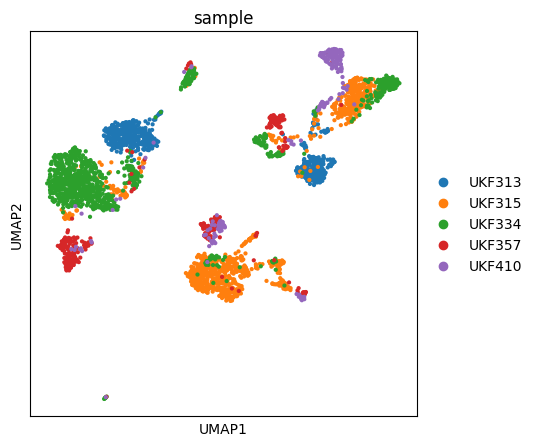

In [5]:
# UMAP 시각화
sc.pp.neighbors(adata)
sc.tl.umap(adata)
fig = sc.pl.umap(adata, color='sample', return_fig=True)
fig.set_size_inches(5, 5)
plt.show()

2024-10-31 11:17:45,421 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-10-31 11:17:46,936 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-10-31 11:17:46,966 - harmonypy - INFO - Iteration 1 of 30
2024-10-31 11:17:47,476 - harmonypy - INFO - Iteration 2 of 30
2024-10-31 11:17:47,948 - harmonypy - INFO - Iteration 3 of 30
2024-10-31 11:17:48,429 - harmonypy - INFO - Iteration 4 of 30
2024-10-31 11:17:48,907 - harmonypy - INFO - Iteration 5 of 30
2024-10-31 11:17:49,308 - harmonypy - INFO - Iteration 6 of 30
2024-10-31 11:17:49,609 - harmonypy - INFO - Iteration 7 of 30
2024-10-31 11:17:49,852 - harmonypy - INFO - Iteration 8 of 30
2024-10-31 11:17:50,025 - harmonypy - INFO - Iteration 9 of 30
2024-10-31 11:17:50,229 - harmonypy - INFO - Iteration 10 of 30
2024-10-31 11:17:50,385 - harmonypy - INFO - Iteration 11 of 30
2024-10-31 11:17:50,635 - harmonypy - INFO - Iteration 12 of 30
2024-10-31 11:17:50,794 - harmonypy - INFO - Iteration 13 of

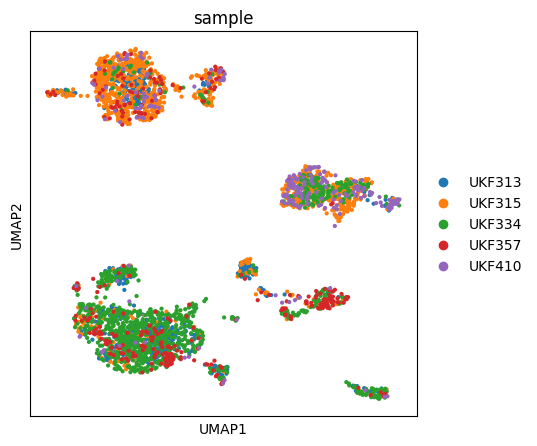

In [6]:
# Harmony로 배치 보정
ho = hm.run_harmony(adata.obsm['X_pca'], adata.obs, 'sample', max_iter_harmony = 30)
adata.obsm['X_pca_harmony'] = ho.Z_corr.T  # Harmony 보정된 PCA 결과를 저장

# UMAP 시각화
sc.pp.neighbors(adata, use_rep='X_pca_harmony')
sc.tl.umap(adata)
fig = sc.pl.umap(adata, color='sample', return_fig=True)
fig.set_size_inches(5, 5)
plt.show()

# Clustering

/tmp/ipykernel_600782/1460678021.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1)


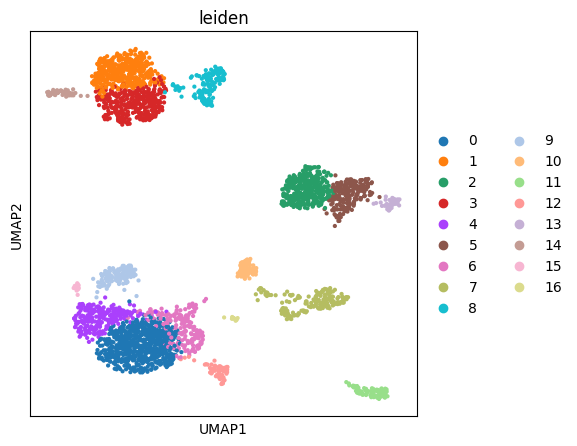

In [7]:
# leiden clustering
sc.tl.leiden(adata, resolution=1)
fig = sc.pl.umap(adata, color='leiden', return_fig=True)
fig.set_size_inches(5, 5)
plt.show()

# InferCNVpy

In [8]:
adata

AnnData object with n_obs × n_vars = 3261 × 22425
    obs: 'sample', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'sample_colors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

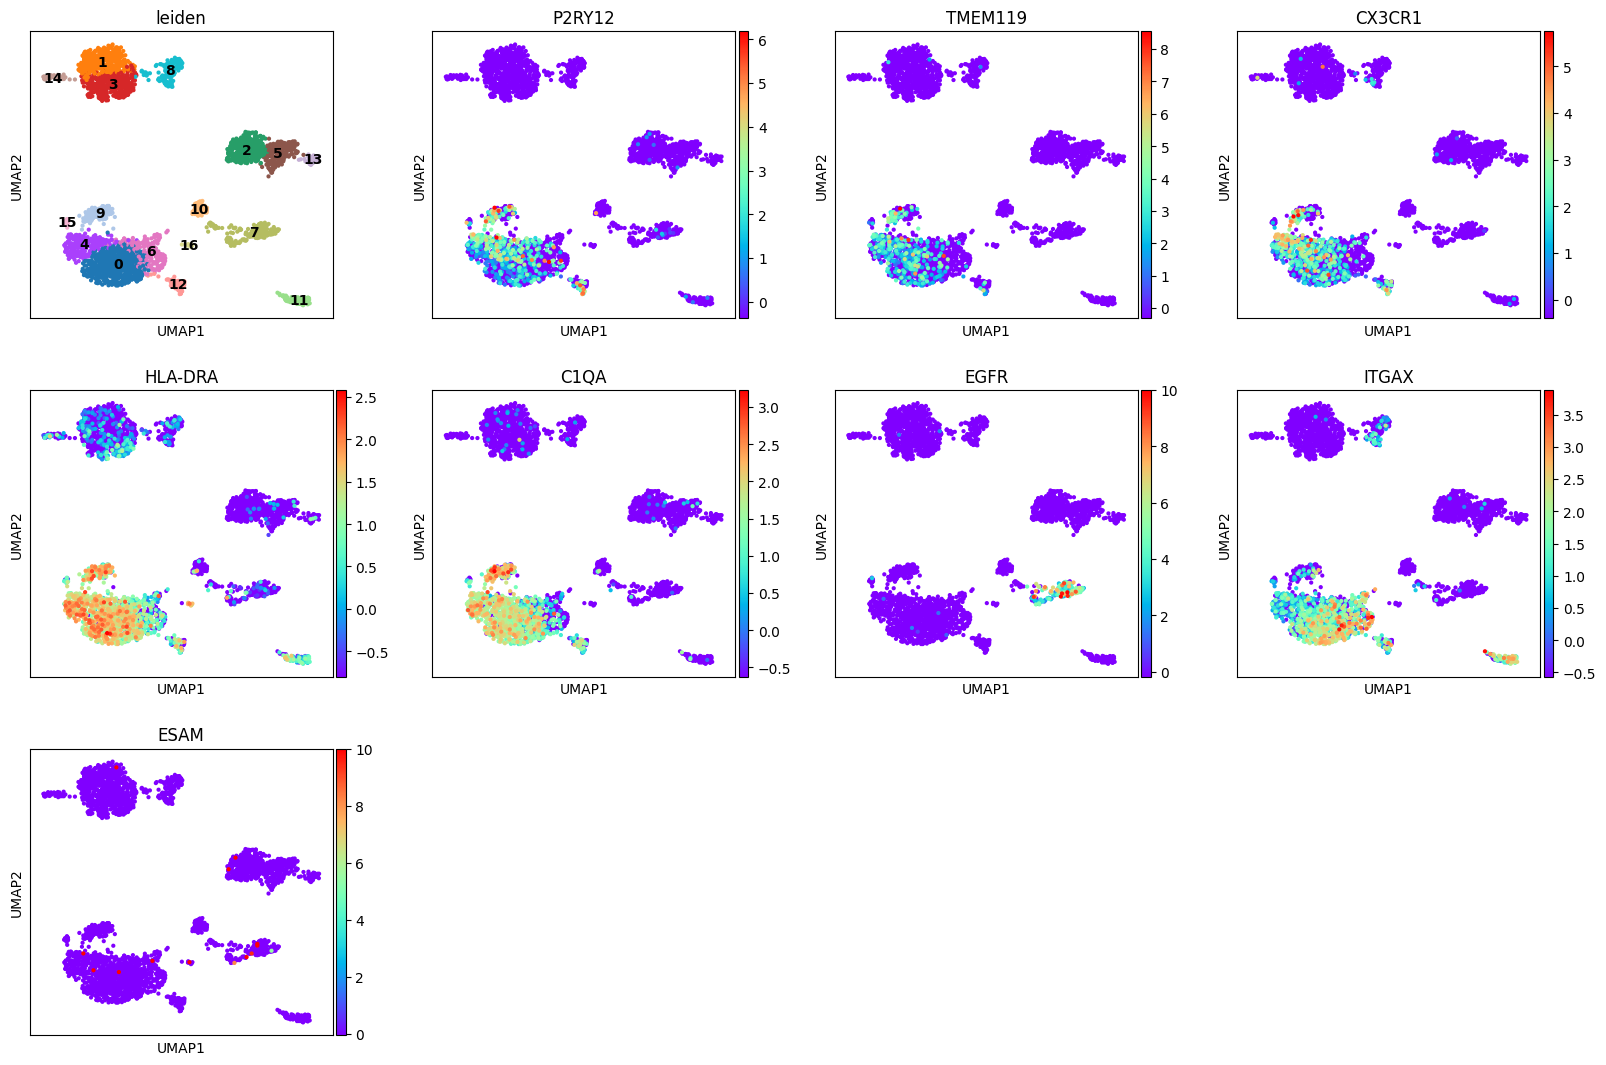

In [29]:
rcParams['figure.figsize'] = 4, 4
sc.pl.umap(
    adata,
    # color = ['leiden', 'OLIG2', 'PDGFRA', 'SOX10', 'MBP', 'MOG', 'PLP1', 'CNP', 'MAP2', 'TUBB3', 'RBFOX3', 'FN1', 'S100A4'],
    color = ['leiden', 'P2RY12', 'TMEM119', 'CX3CR1', 'HLA-DRA', 'C1QA', 'EGFR', 'ITGAX', 'ESAM'],
    # color = ['leiden', 'GFAP', 'MAP2', 'SYN1', 'PTPRC', 'ITGAX', 'CCR7', 'HLA-DRA'],
    # color = ['leiden', 'CD3E', 'CD4', 'CD8A', 'FOXP3', 'NCR1', 'TRDC', 'CD19', 'PTPRC'],
    # color = ['leiden', 'SNAP25', 'SYP'],
    # frameon = False,
    legend_loc = 'on data',
    color_map = 'rainbow',
)

/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/jsw/jswenv/lib/python3.10/site-packages/scan

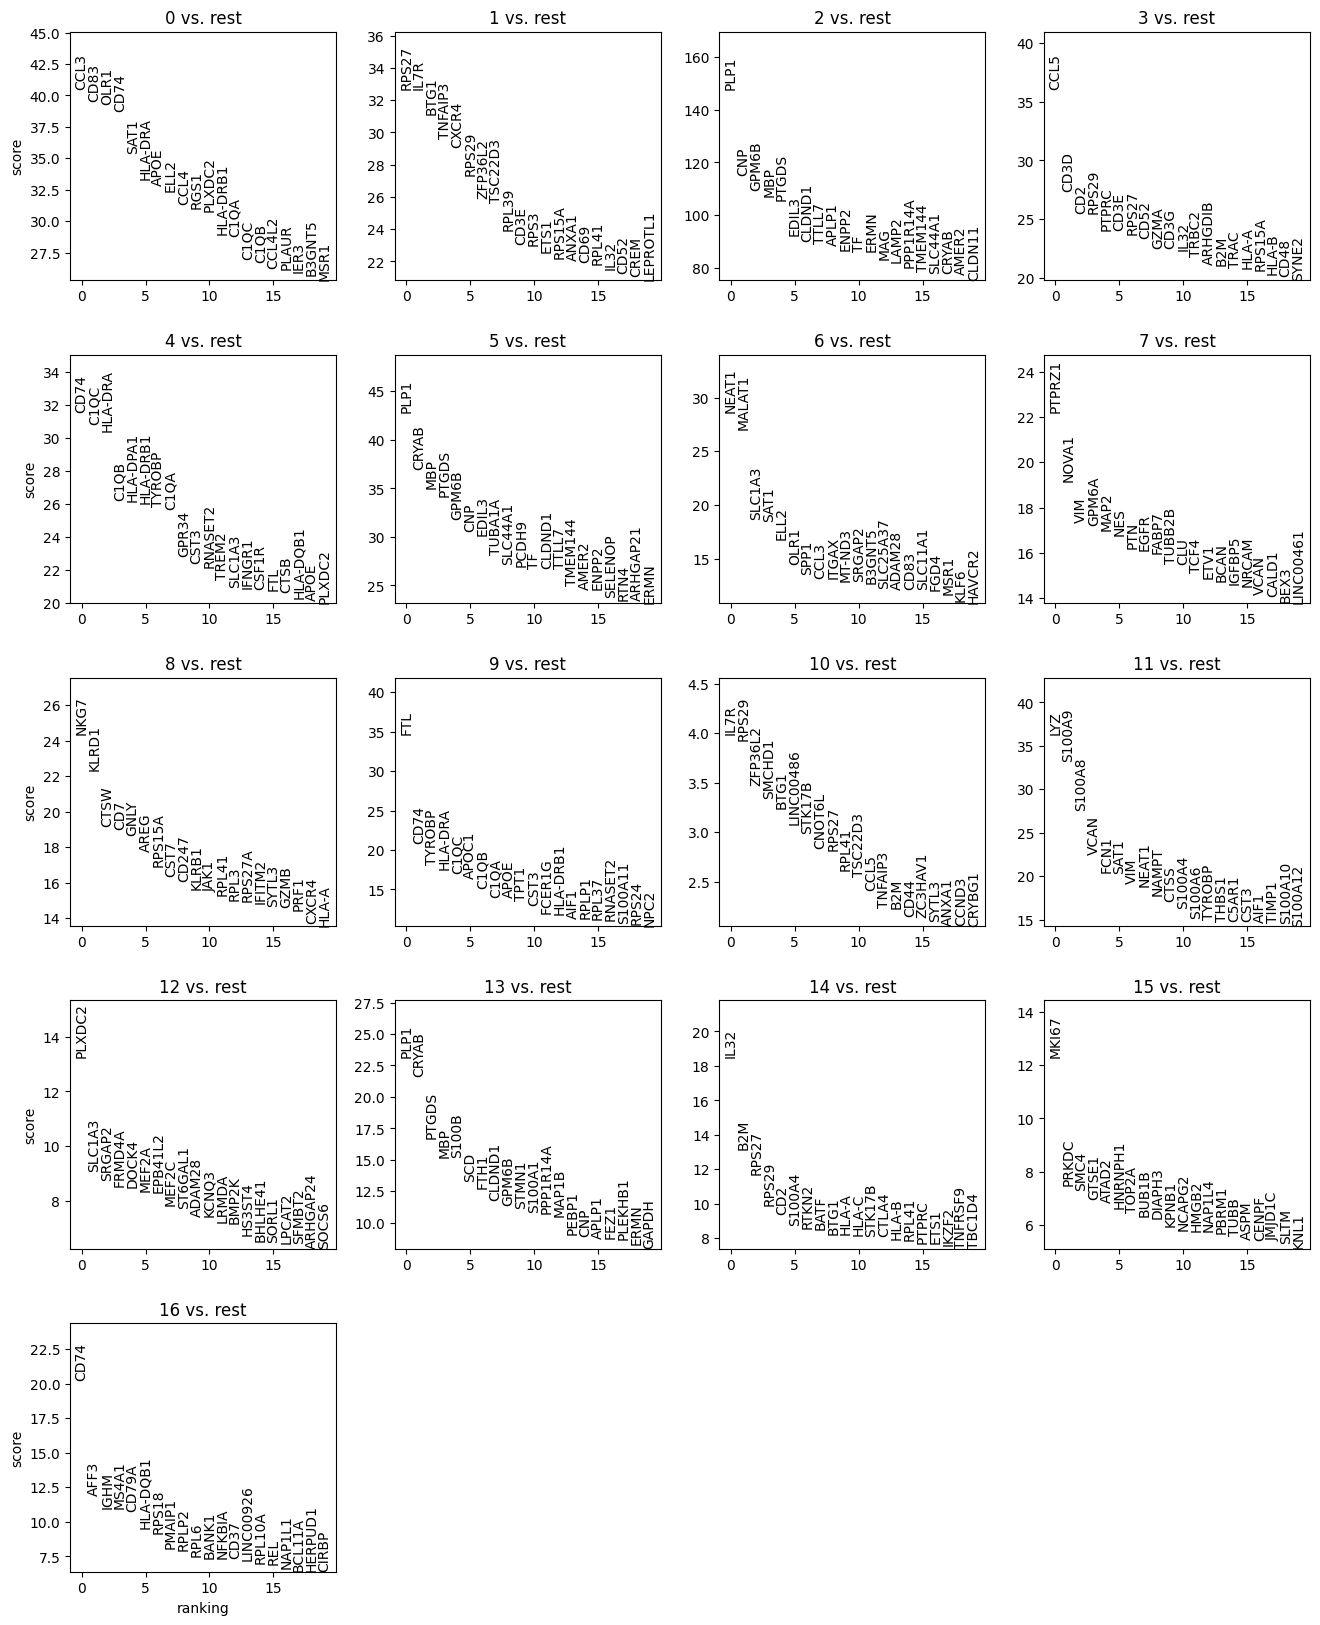

In [22]:
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes = 20, sharey = False, fontsize = 10)


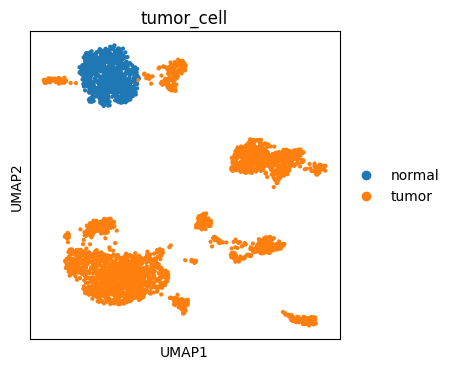

In [10]:
adata.obs['tumor_cell'] = 'tumor'
adata.obs.loc[adata.obs['leiden'] == '1', 'tumor_cell'] = 'normal'
adata.obs.loc[adata.obs['leiden'] == '3', 'tumor_cell'] = 'normal'
sc.pl.umap(
    adata,
    color = ['tumor_cell'],
)

## adata.var에 chromosome, start, end column 추가

In [11]:
adata.var.index

Index(['AL627309.1', 'AL669831.5', 'FAM87B', 'LINC00115', 'FAM41C',
       'AL645608.3', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       ...
       'MT-ND5', 'MT-ND6', 'MT-CYB', 'BX004987.1', 'MAFIP', 'AC011043.1',
       'AL592183.1', 'AC007325.4', 'AL354822.1', 'AC240274.1'],
      dtype='object', length=22425)

In [12]:
import pandas as pd

# GTF 파일 경로
gtf_file = '../../Database/gencode.v44.annotation.gtf'

# 파일 로드
gtf = pd.read_csv(
    gtf_file, sep = '\t', comment = '#', header = None,
    names = ['chromosome', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
)

# gene feature만 선택
gtf = gtf[gtf['feature'] == 'gene']

# attribute column에서 gene_id 및 gene_name 추출
gtf['gene_id'] = gtf['attribute'].str.extract('gene_id "([^"]+)"')
gtf['gene_name'] = gtf['attribute'].str.extract('gene_name "([^"]+)"')

# 필요한 열 선택
gtf = gtf[['chromosome', 'start', 'end', 'gene_name']]

# gene_name을 인덱스로 설정
gtf.set_index('gene_name', inplace = True)

# gtf에서 중복된 index 제거
duplicates = gtf.index[gtf.index.duplicated()].unique()
gtf = gtf[~gtf.index.duplicated(keep = 'first')]

# 공통된 gene만 선택
common_genes = gtf.index.intersection(adata.var.index)
filtered_gtf = gtf.loc[common_genes]
adata = adata[:, common_genes]

print(len(adata.var.index))
print(len(filtered_gtf.index))

17282
17282


In [13]:
# gtf 정보와 adata.var 병합
adata.var = pd.merge(filtered_gtf, adata.var, how = 'inner', left_index = True, right_index = True)

# 필요한 열 확인
# adata.var.head()

In [14]:
import infercnvpy as cnv

cnv.tl.infercnv(
    adata = adata,
    reference_key = 'tumor_cell',
    reference_cat = 'normal',
    window_size = 100,
    n_jobs = 24
)

100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


In [15]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 1459 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


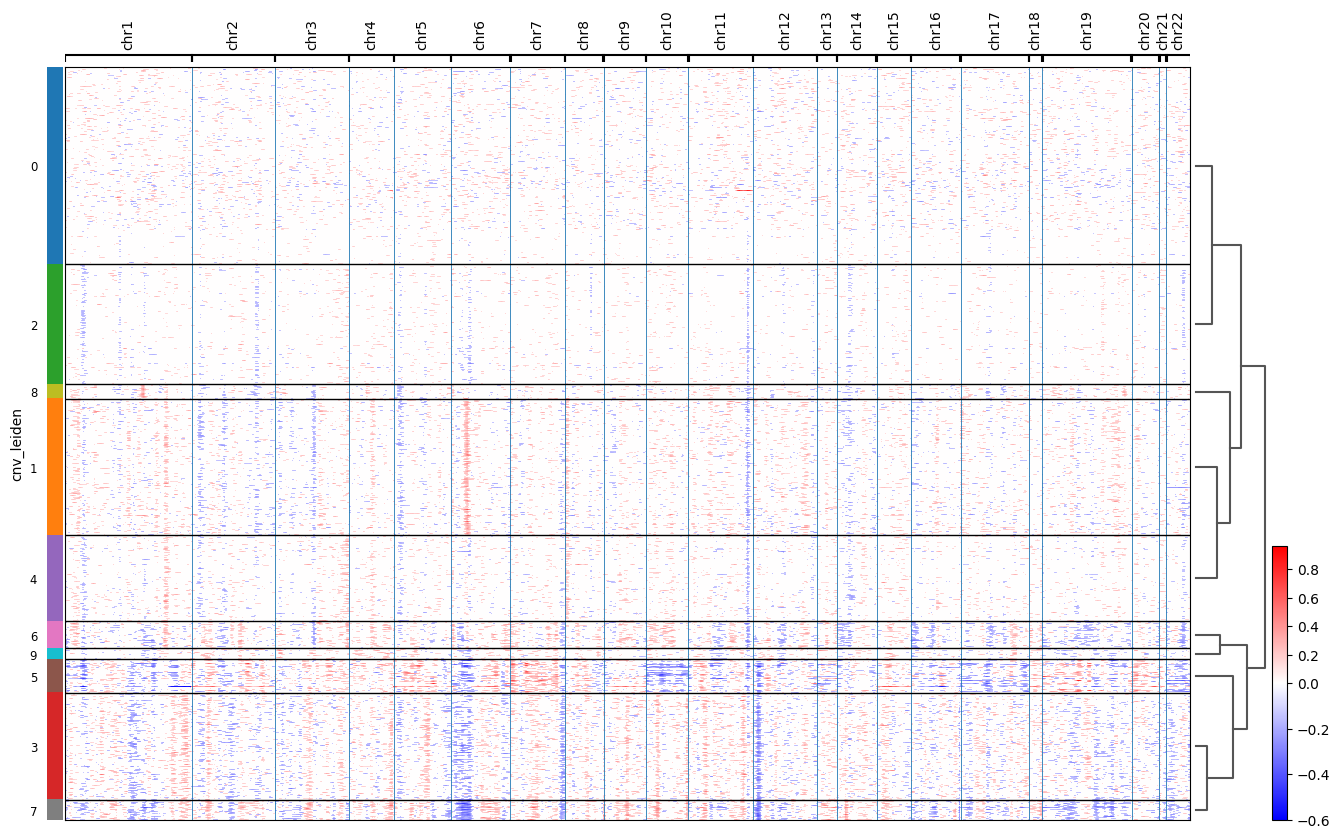

In [16]:
cnv.pl.chromosome_heatmap(adata, groupby = 'cnv_leiden', dendrogram = True)

/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 1459 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


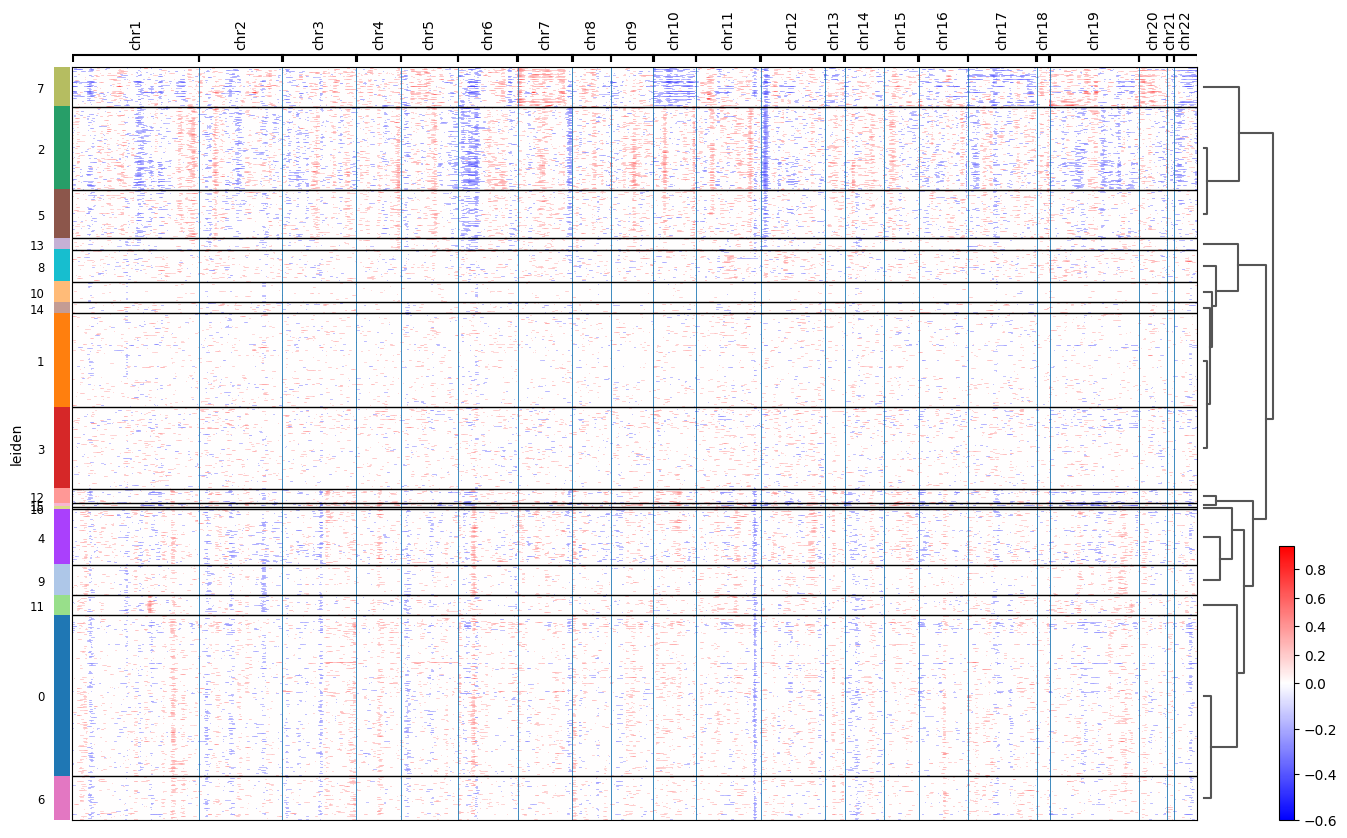

In [17]:
cnv.pl.chromosome_heatmap(adata, groupby = 'leiden', dendrogram = True)

In [18]:
cnv.tl.cnv_score(adata)

... storing 'chromosome' as categorical


<Axes: title={'center': 'cnv_score'}, xlabel='UMAP1', ylabel='UMAP2'>

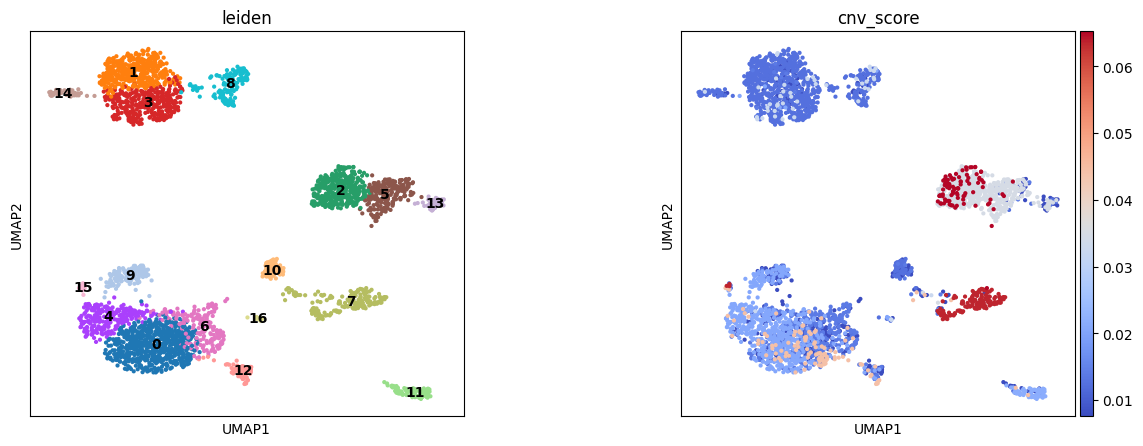

In [19]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={"wspace": 0.5})
sc.pl.umap(adata, color="leiden", ax=ax1, show=False, legend_loc = 'on data')
sc.pl.umap(adata, color="cnv_score", ax=ax2, show=False, color_map = 'coolwarm')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


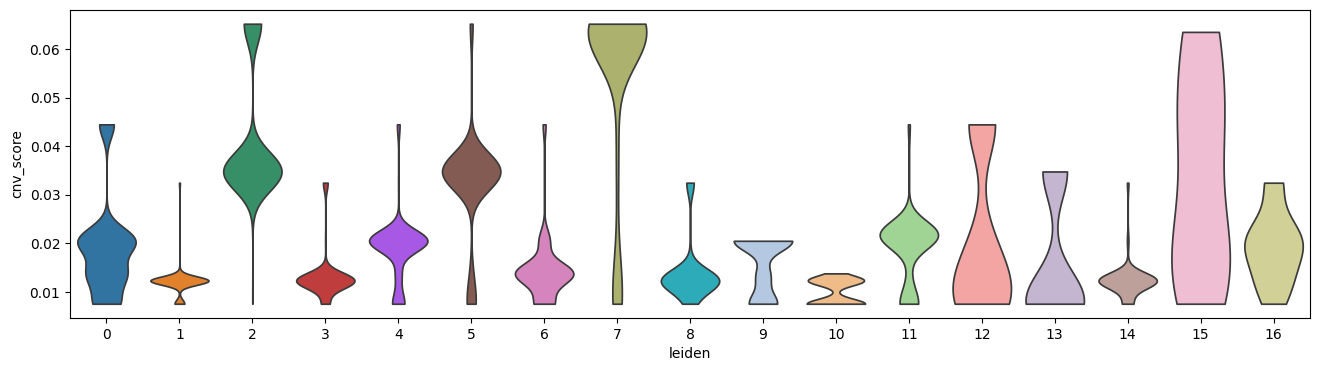

In [20]:
# plot violin plot by cnv_score
fig, ax = plt.subplots(figsize = (16, 4))

sc.pl.violin(
    adata,
    keys = ['cnv_score'],
    groupby = 'leiden',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    # layer = 'scvi_normalized', use_raw = False,
    ax = ax,
)

# cell type annotation

In [30]:
cell_type = {
    '0': 'Mo/Mp',
    '1': 'CD4',
    '2': 'Oligodendrocytes',
    '3': 'CD8',
    '4': 'Mo/Mp',
    '5': 'Oligodendrocytes',
    '6': 'Mo/Mp',
    '7': 'Malignant',
    '8': 'ILC/gdT',
    '9': 'Mo/Mp',
    '10': 'Etc',
    '11': 'DC',
    '12': 'Mo/Mp',
    '13': 'Oligodendrocytes',
    '14': 'Treg',
    '15': 'Mo/Mp',
    '16': 'B',
}

In [33]:
# Assigning cell types
# adata obs에 cell_type column 추가
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)
adata.obs.head(5)

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,leiden,tumor_cell,cnv_leiden,cnv_score,cell_type
AAACGAAAGAAGCGGG-1,UKF313,225,305.0,0.983607,15.737705,1,normal,0,0.012299,CD4
AAACGAAGTTGTCAGT-1,UKF313,467,779.0,2.567394,6.546855,0,tumor,2,0.007550,Mo/Mp
AAAGAACGTACCTTCC-1,UKF313,316,479.0,3.131524,0.835073,12,tumor,4,0.013801,Mo/Mp
AAAGGGCAGGAACGCT-1,UKF313,232,308.0,4.870130,1.948052,0,tumor,2,0.007550,Mo/Mp
AAAGGTACAATCTGCA-1,UKF313,412,658.0,3.799392,6.079028,0,tumor,2,0.007550,Mo/Mp


In [34]:
# Monocytic cells 중 P2RY12 발현이 0 초과인 cell들을 Microglia로 변경
monocytic_cells = adata.obs['cell_type'] == 'Mo/Mp'
p2ry12_positive = adata[:, 'TMEM119'].to_df().iloc[:, 0] > 0

# adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Microglia'])
adata.obs.loc[monocytic_cells & p2ry12_positive, 'cell_type'] = 'Microglia'

In [35]:
# 모든 cell 중 cnv_score가 0.05 이상인 cell들을 Malignant로 변경
Malignant_cells = adata.obs['cnv_score'] > 0.05

# adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Microglia'])
adata.obs.loc[Malignant_cells, 'cell_type'] = 'Malignant'

In [36]:
# https://colorswall.com/palette/68
colors = ['#f44336', '#9c27b0', '#3f51b5', '#2196f3', '#009688', '#4caf50', '#ffc107', '#ff9800', '#795548', '#9e9e9e', '#607d8b']
# colors = colors[::-1]
adata.uns['cell_type_colors'] = colors

In [37]:
import pandas as pd

desired_order = ['Malignant', 'Mo/Mp', 'ILC/gdT', 'CD4', 'Oligodendrocytes', 'Treg', 'Microglia','CD8', 'DC', 'B', 'Etc']
adata.obs['cell_type'] = pd.Categorical(
    values = adata.obs.cell_type, categories = desired_order, ordered = True
)

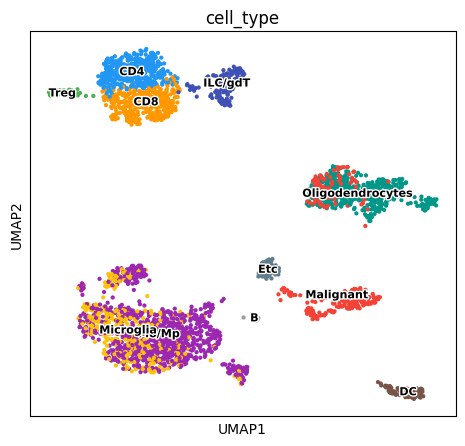

In [38]:
rcParams['figure.figsize'] = (5.5, 5)
sc.pl.umap( 
    adata,
    color = ['cell_type'],
    # frameon = False,
    legend_loc = 'on data',
    legend_fontsize = 8,
    legend_fontoutline = 2,
    # palette = sc.pl.palettes.vega_10
    # color_map = 'bwr',
    # groups = ['Microglia']
)

In [39]:
marker_genes_dict = {
    'Malignant': ['EGFR'],
    'Mo/Mp': ['HLA-DRA', 'C1QA'],
    'Microglia': ['P2RY12', 'TMEM119'],
    'CD4': ['CD4'],
    'CD8': ['CD8A'],
    'Treg': ['FOXP3'],
    'ILC/gdT': ['NCR1', 'TRDC'],
    'Oligodendrocyte': ['MBP', 'MAG'],
    'B': ['CD19'],
    'DC': ['ITGAX'],
    'Etc': ['ITGAX']
}

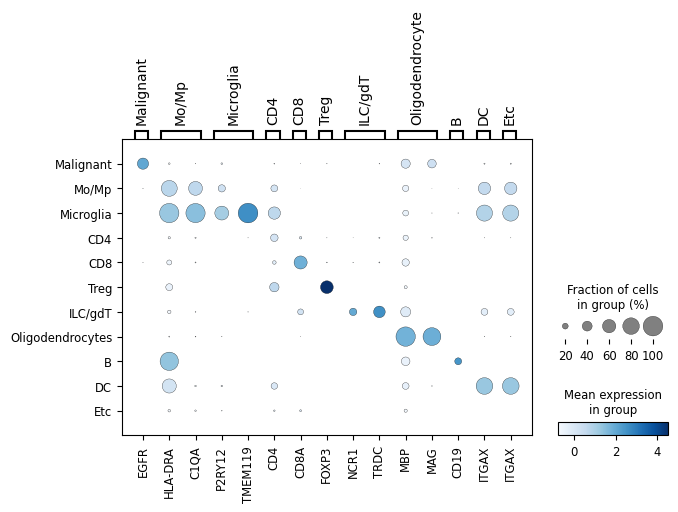

In [40]:
desired_order = ['Malignant', 'Mo/Mp', 'Microglia', 'CD4', 'CD8','Treg', 'ILC/gdT', 'Oligodendrocytes', 'B','DC', 'Etc']
adata.obs['cell_type'] = pd.Categorical(
    values = adata.obs.cell_type, categories = desired_order, ordered = True
)

# sc.tl.dendrogram(adata, groupby = 'cell_type')    # dot plot 한번 그린 후 cell type annotation 바꾸면 이거 돌려줘야 함

# excluded_cell_types = ['Etc']
# temp_adata_subset = adata[~adata.obs['cell_type'].isin(excluded_cell_types), :]
sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby = 'cell_type',
    # dendrogram = True,
    # var_group_rotation = 45,
    cmap = 'Blues',
)
# del temp_adata_subset, excluded_cell_types

# Save

In [41]:
adata

AnnData object with n_obs × n_vars = 3261 × 17282
    obs: 'sample', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', 'leiden', 'tumor_cell', 'cnv_leiden', 'cnv_score', 'cell_type'
    var: 'chromosome', 'start', 'end', 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'sample_colors', 'leiden', 'leiden_colors', 'tumor_cell_colors', 'cnv', 'cnv_neighbors', 'cnv_leiden', 'cnv_leiden_colors', 'dendrogram_cnv_leiden', 'dendrogram_leiden', 'rank_genes_groups', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony', 'X_cnv', 'X_cnv_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities', 'cnv_neighbors_distances', 'cnv_neighbors_connectivities'

In [42]:
adata.write_h5ad('../data/adata_annotated.h5ad')